## 1. Data Understanding & Processing 
  - 1.1 Reading The data & merging it
  - 1.2 Understanding The Data
  - 1.3 Visualizing The Data
## 2. Data preparation 
  - 2.1 imputation 
  - 2.2 Feature Engineering 
## 3. Modeling & Generating Predictions
  - 3.1 LGBM Classifier
  - 3.2 Catboost classifier
  - 3.3 XGB Dmatrix
  - 3.4 XGB Regressor
  - 3.5 Hold-out Validation
  - 3.6 XGB Classifier
  - 3.7 Generating Predictions   

## Importing the Libraries

In [846]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from collections import  OrderedDict

sns.set()


In [847]:
# import os

# file_path = r'C:\Users\yaman\Desktop\Stroke-Prediction-model\data\train.csv'

# if os.path.exists(file_path):
#     print("File exists!")
# else:
#     print("File not found!")


## Reading The Train Sets

In [848]:
# First of all we load the data and read the files 
# synthetic_training_set_path = "data/train.csv"

# Real_World_training_set_path = 'data/healthcare-dataset-stroke-data.csv

synthetic_training_set = pd.read_csv('../data/train.csv')

Real_World_training_set = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

test_set = pd.read_csv('../data/test.csv')  



## Merging the data

In [849]:
# we merge the synthetic data and the real world data 
training_set= pd.concat([Real_World_training_set , synthetic_training_set])
training_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


## Understanding the data


In [850]:
training_set.info() 
# here we realize that we are missing some data in the bmi column 

training_set.isnull().sum() 
# ok this tells us that we are missing 201 data in the bmi column 
# which is not that much but we gonna try to predict the missing data

# now i want to see how many patients had stroke and how many did not 

training_set["stroke"].value_counts() 




<class 'pandas.core.frame.DataFrame'>
Index: 20414 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20414 non-null  int64  
 1   gender             20414 non-null  object 
 2   age                20414 non-null  float64
 3   hypertension       20414 non-null  int64  
 4   heart_disease      20414 non-null  int64  
 5   ever_married       20414 non-null  object 
 6   work_type          20414 non-null  object 
 7   Residence_type     20414 non-null  object 
 8   avg_glucose_level  20414 non-null  float64
 9   bmi                20213 non-null  float64
 10  smoking_status     20414 non-null  object 
 11  stroke             20414 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB


stroke
0    19533
1      881
Name: count, dtype: int64

In [851]:
training_set.describe()

training_set['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [852]:
training_set["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [853]:
training_set["work_type"].value_counts()

work_type
Private          12677
Self-employed     2758
children          2725
Govt_job          2190
Never_worked        64
Name: count, dtype: int64

C:\Users\yaman\AppData\Local\Temp\ipykernel_18020\1505286037.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_set['avg_glucose_level'])


<Axes: xlabel='avg_glucose_level', ylabel='Density'>

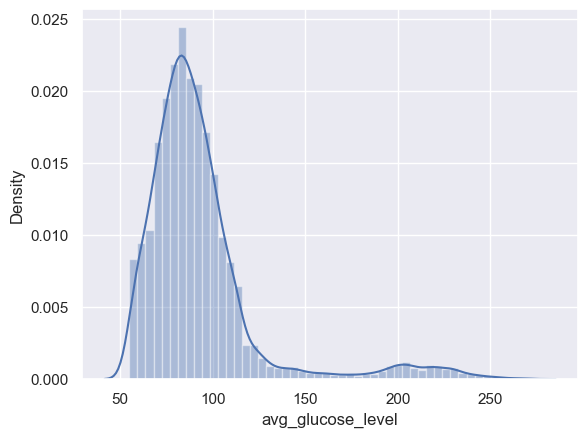

In [854]:
sns.distplot(training_set['avg_glucose_level'])

Dropping the id column 

In [855]:
gender_relation = pd.crosstab(training_set['stroke'], training_set["gender"])
print(gender_relation)

# i will drop the other values because i dont care about it since it doesnt really effect anything 
#training_set[training_set['gender'] == 'Other']

training_set.drop(training_set[training_set['id'] == 9363] .index, inplace = True)
training_set.drop(training_set[training_set['id'] == 56156] .index, inplace = True)

training_set[training_set['gender'] == 'Other']

gender  Female  Male  Other
stroke                     
0        11931  7600      2
1          509   372      0


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [856]:
# i dont need the id column anymore so i am going to drop it 
training_set.drop('id', axis = 1 , inplace =True)

training_set.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [857]:
training_set.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,20411,20411.000000,20411.000000,20411.000000,20411,20411,20411,20411.000000,20210.000000,20411,20411.000000
unique,2,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,12440,NaN,NaN,NaN,13737,12675,10236,NaN,NaN,8172,NaN
mean,NaN,41.873088,0.061682,0.031013,NaN,NaN,NaN,93.319721,28.302572,NaN,0.043163
std,NaN,21.756564,0.240584,0.173356,NaN,NaN,NaN,32.476845,7.021415,NaN,0.203229
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,75.220000,23.500000,NaN,0.000000
50%,NaN,43.000000,0.000000,0.000000,NaN,NaN,NaN,86.250000,27.700000,NaN,0.000000
75%,NaN,58.000000,0.000000,0.000000,NaN,NaN,NaN,99.730000,32.200000,NaN,0.000000


In [858]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20411 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             20411 non-null  object 
 1   age                20411 non-null  float64
 2   hypertension       20411 non-null  int64  
 3   heart_disease      20411 non-null  int64  
 4   ever_married       20411 non-null  object 
 5   work_type          20411 non-null  object 
 6   Residence_type     20411 non-null  object 
 7   avg_glucose_level  20411 non-null  float64
 8   bmi                20210 non-null  float64
 9   smoking_status     20411 non-null  object 
 10  stroke             20411 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.9+ MB


## Imputation

In [859]:
bmi_mean =training_set['bmi'].mean()
print(f"bmi mean is : {bmi_mean}")

bmi_median =training_set['bmi'].median()
print(f"bmi median is : {bmi_median}")

training_set['bmi'].fillna(training_set['bmi'].median(),inplace =True)
training_set.head()

bmi mean is : 28.302571994062344
bmi median is : 27.7


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [860]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20411 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             20411 non-null  object 
 1   age                20411 non-null  float64
 2   hypertension       20411 non-null  int64  
 3   heart_disease      20411 non-null  int64  
 4   ever_married       20411 non-null  object 
 5   work_type          20411 non-null  object 
 6   Residence_type     20411 non-null  object 
 7   avg_glucose_level  20411 non-null  float64
 8   bmi                20411 non-null  float64
 9   smoking_status     20411 non-null  object 
 10  stroke             20411 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.9+ MB


## Visualizing The Data

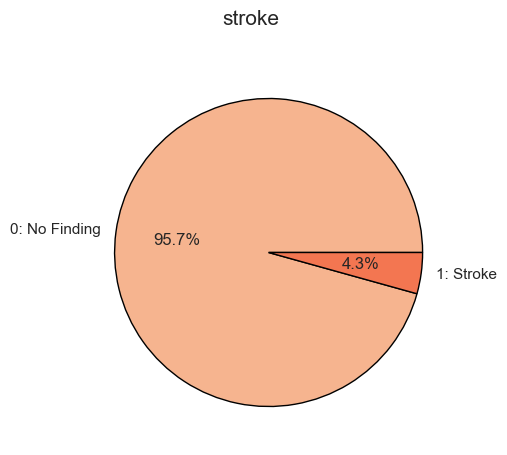

In [861]:
colors = sns.color_palette("rocket_r")


fig, ax = plt.subplots(figsize=(14,5))
# figure title
fig.suptitle('stroke', fontsize=15)


plot_data = training_set['stroke'].value_counts()
plot_labels = plot_data.rename(index={0:'0: No Finding', 1:'1: Stroke'}).index
ax.pie(plot_data, labels=plot_labels, autopct='%1.1f%%', colors=colors, wedgeprops = dict(edgecolor='black'))


plt.show()

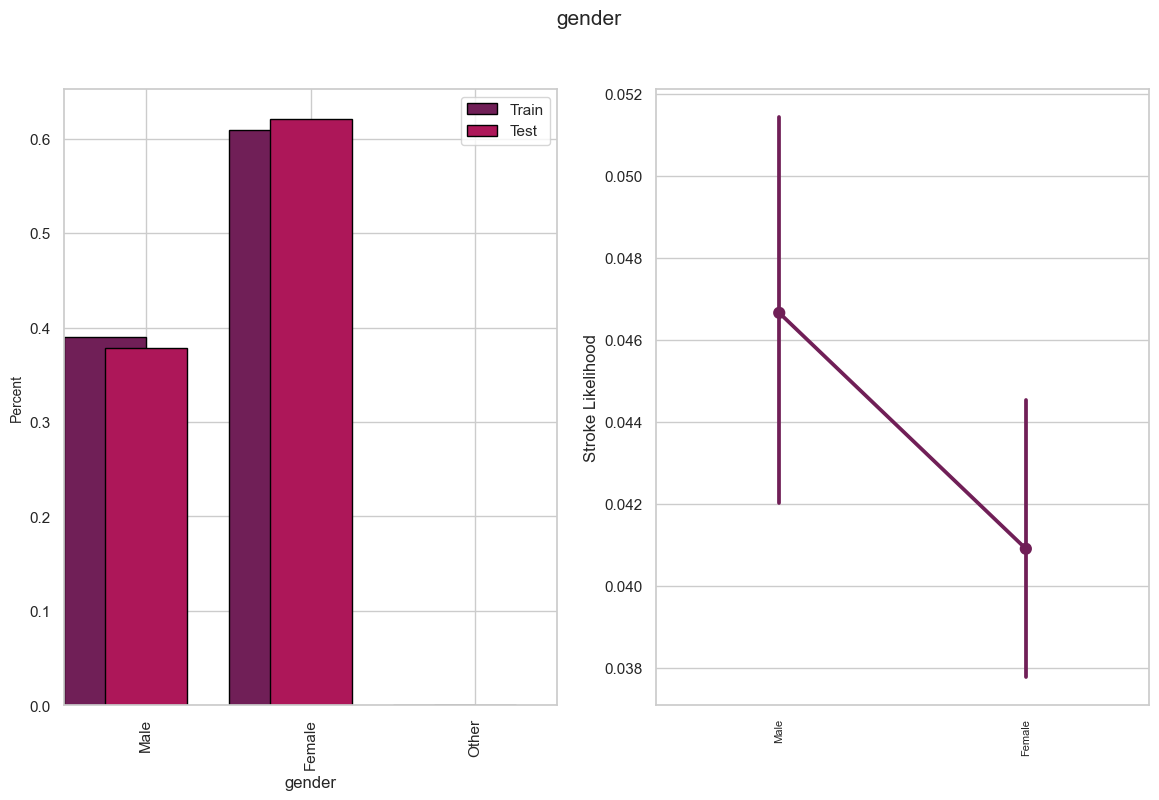

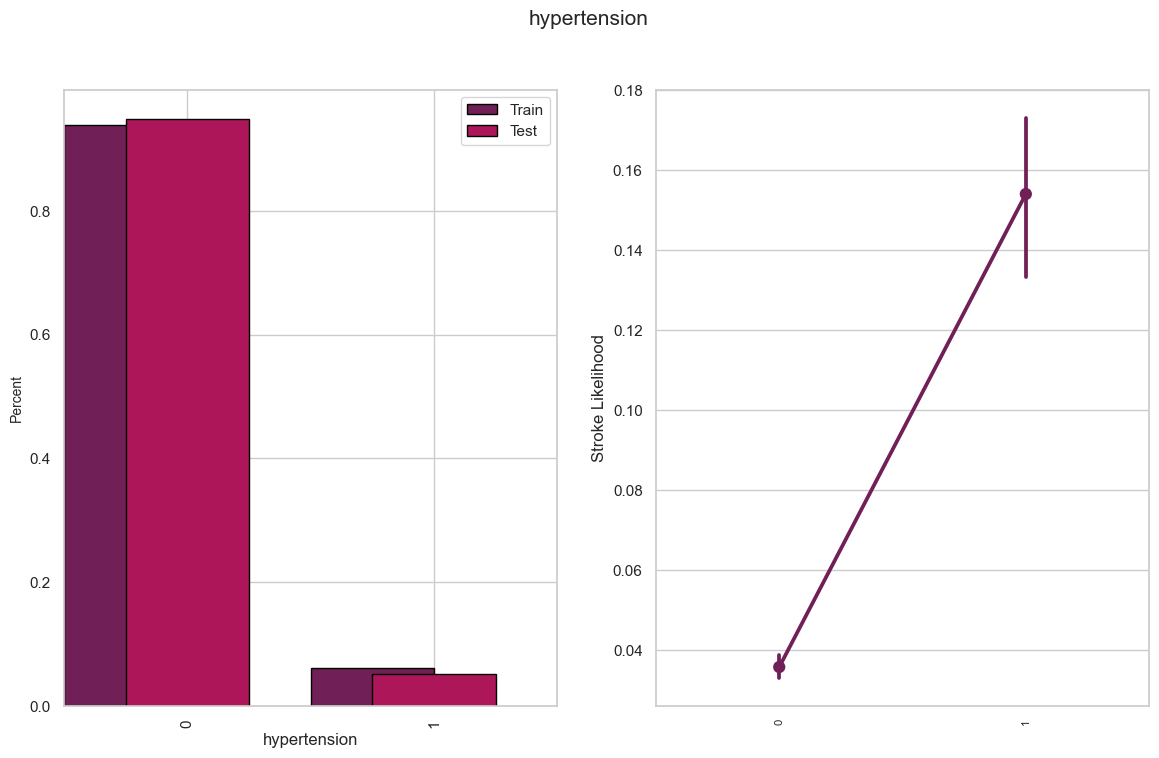

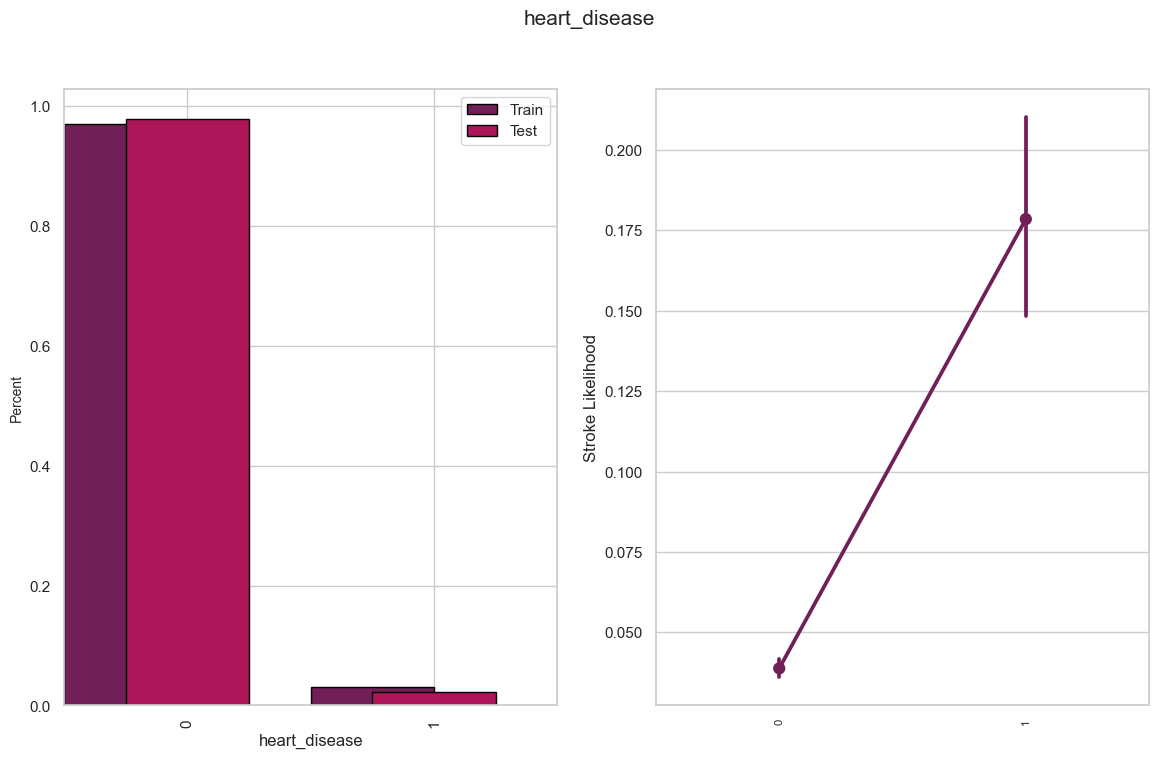

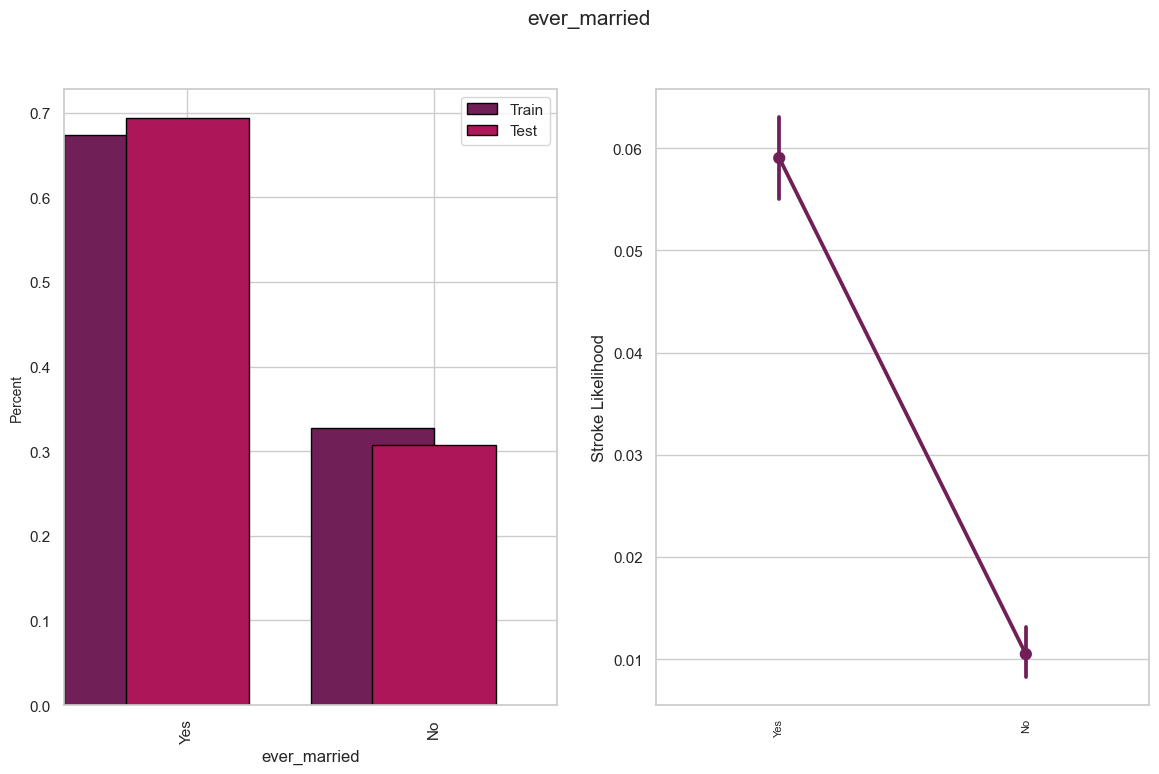

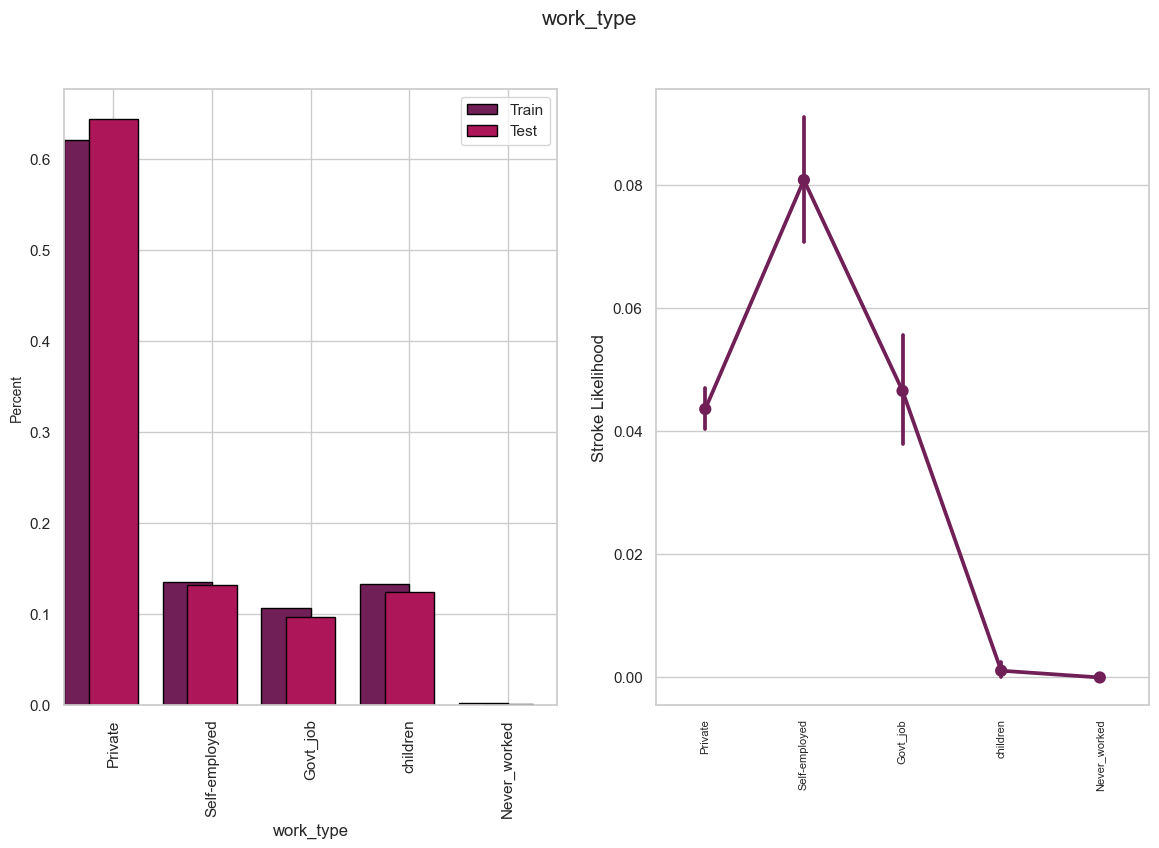

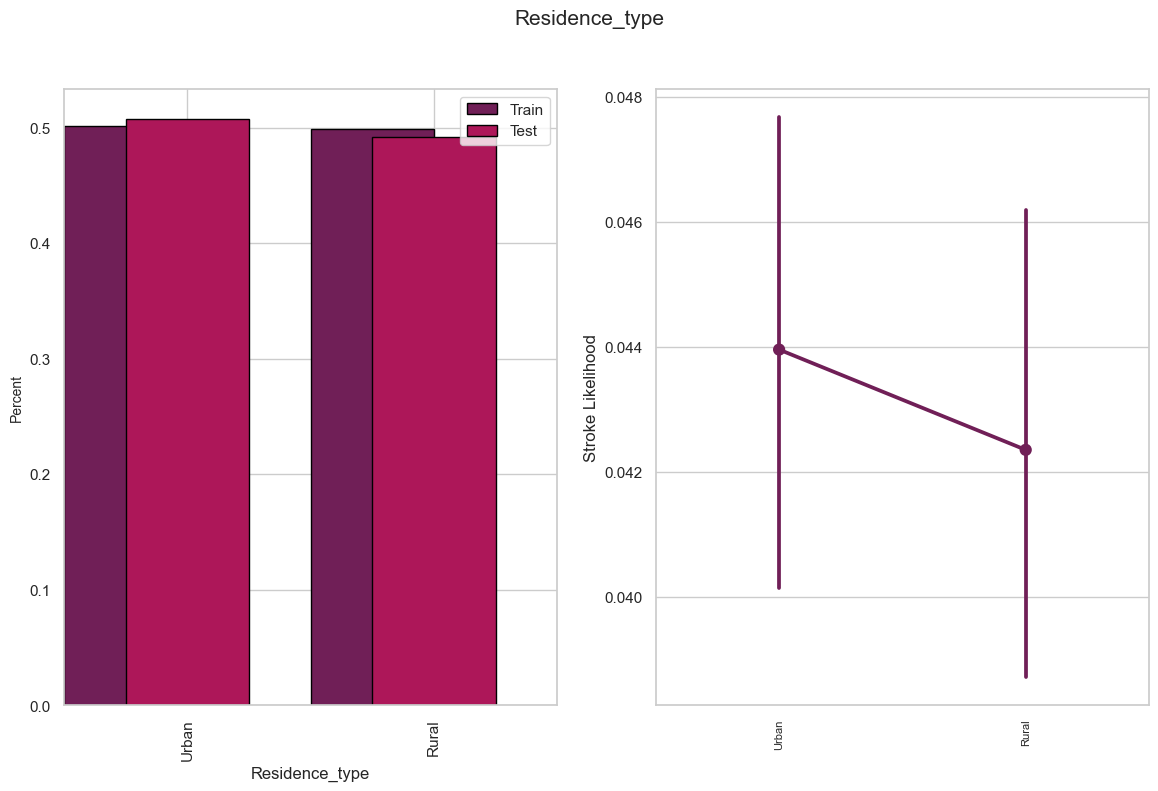

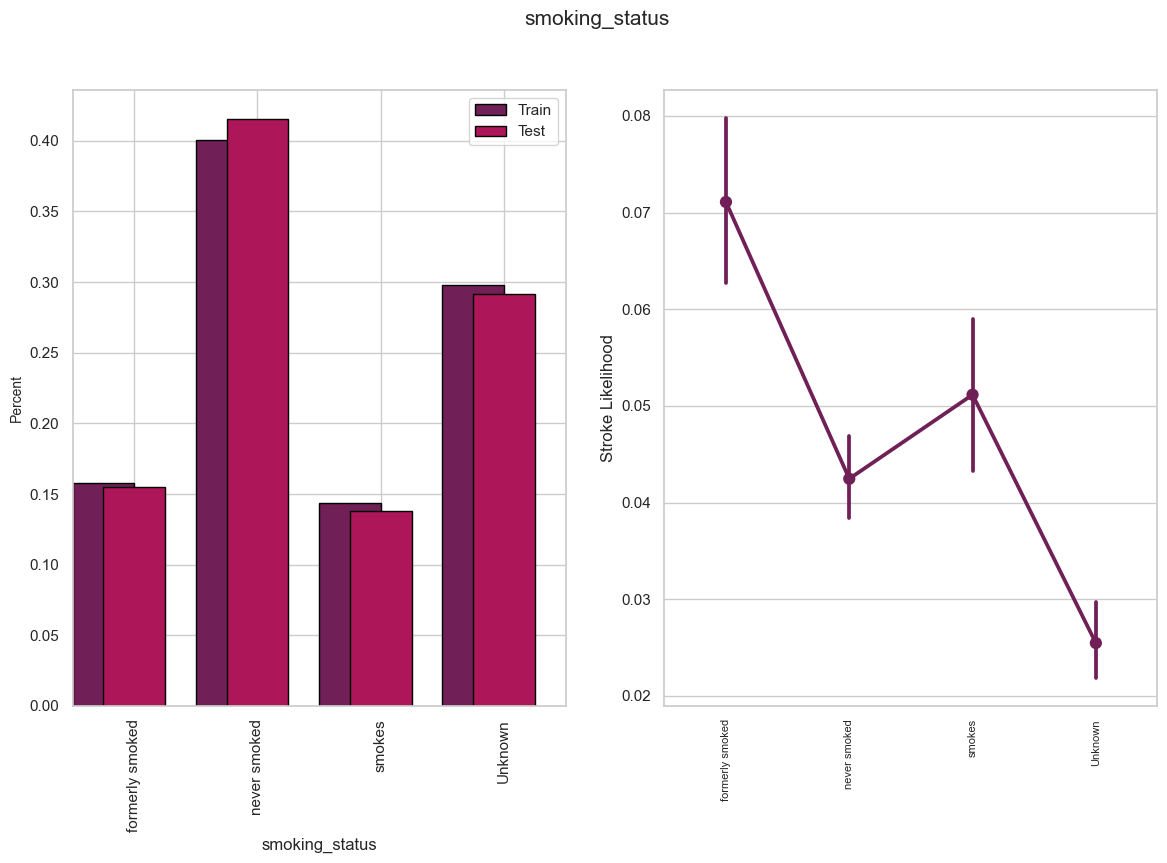

In [862]:
column = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

for i in column:
    x_train = list(training_set[i].unique())
    x_test = list(test_set[i].unique())
    x = list(OrderedDict.fromkeys(x_train + x_test))
    if all([str(item).isdigit() for item in x]): x.sort()

 
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(1, 2, figsize=(14,8))

    fig.suptitle(i, fontsize=15)
    
   
    fig_train = training_set[i].value_counts(normalize=True).reindex(x)
    fig_test = test_set[i].value_counts(normalize=True).reindex(x)
    
    fig_train.plot(kind='bar', align='edge', width=-0.5, ax=ax[0], color=colors[4], edgecolor='black')
    fig_test.plot(kind='bar', align='center', width=0.5, ax=ax[0], color=colors[3], edgecolor='black')
    
    ax[0].set_ylabel('Percent', fontsize=10)
    ax[0].legend(['Train', 'Test'])

    
    sns.pointplot(data=training_set, x=i, y='stroke', color=colors[4], ax=ax[1])
    ax[1].tick_params(axis='x', labelsize=8, rotation=90)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Stroke Likelihood', fontsize = 12)

    plt.show()


C:\Users\yaman\AppData\Local\Temp\ipykernel_18020\2510170621.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(training_set[i], shade=True, color=colors[5], ax=ax[0], label='Train', alpha=0.15, linewidth=4)
C:\Users\yaman\AppData\Local\Temp\ipykernel_18020\2510170621.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_set[i], shade=True, color=colors[3], ax=ax[0], label='Test', alpha=0.15, linewidth=4)
C:\Users\yaman\AppData\Local\Temp\ipykernel_18020\2510170621.py:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = legend.legendHandles


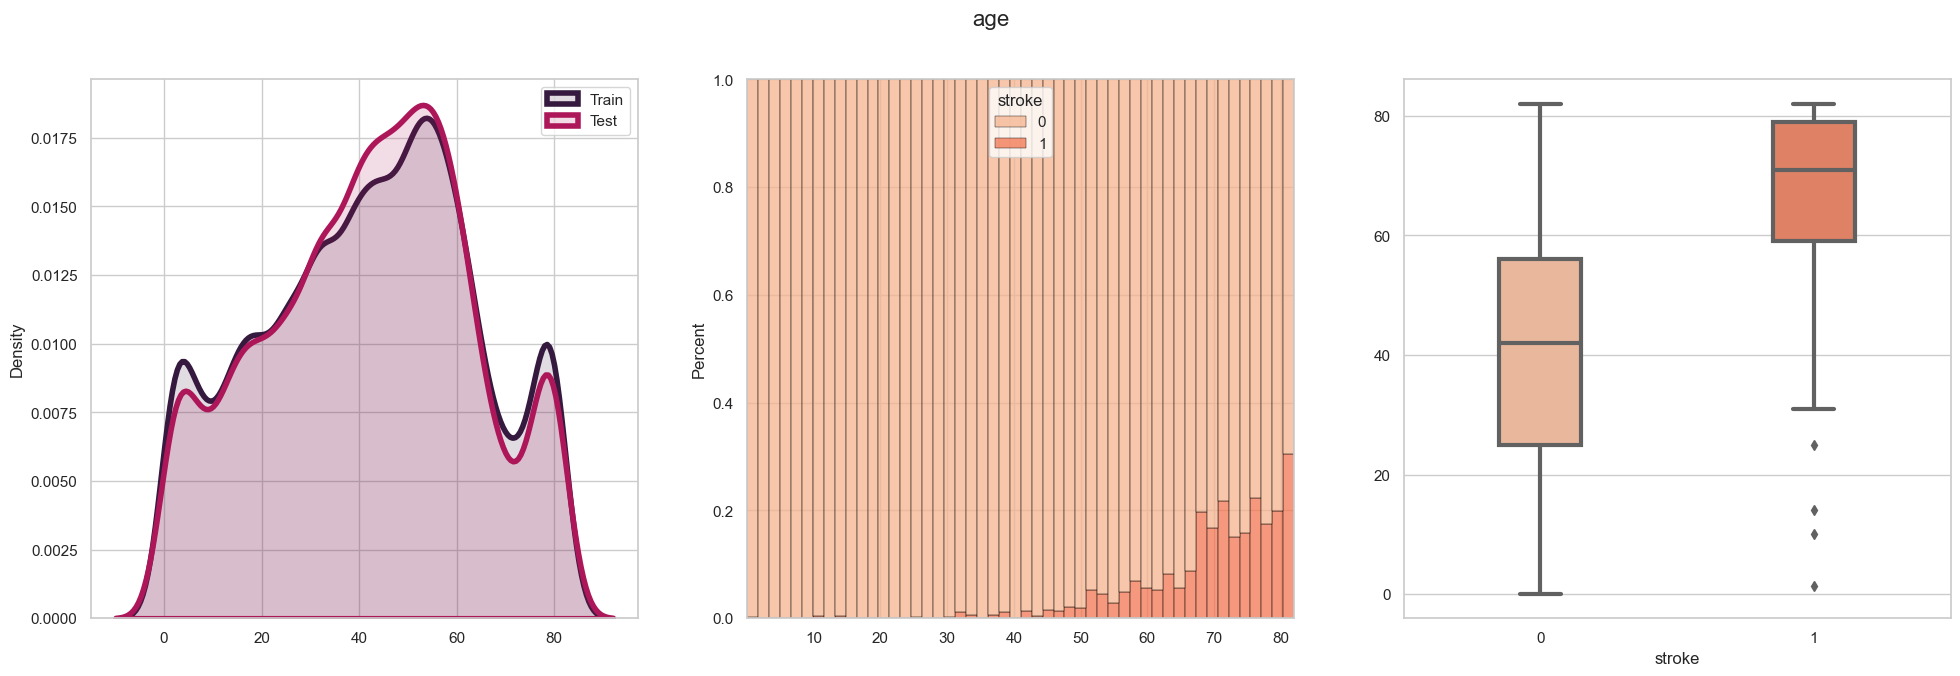

C:\Users\yaman\AppData\Local\Temp\ipykernel_18020\2510170621.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(training_set[i], shade=True, color=colors[5], ax=ax[0], label='Train', alpha=0.15, linewidth=4)
C:\Users\yaman\AppData\Local\Temp\ipykernel_18020\2510170621.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_set[i], shade=True, color=colors[3], ax=ax[0], label='Test', alpha=0.15, linewidth=4)
C:\Users\yaman\AppData\Local\Temp\ipykernel_18020\2510170621.py:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = legend.legendHandles


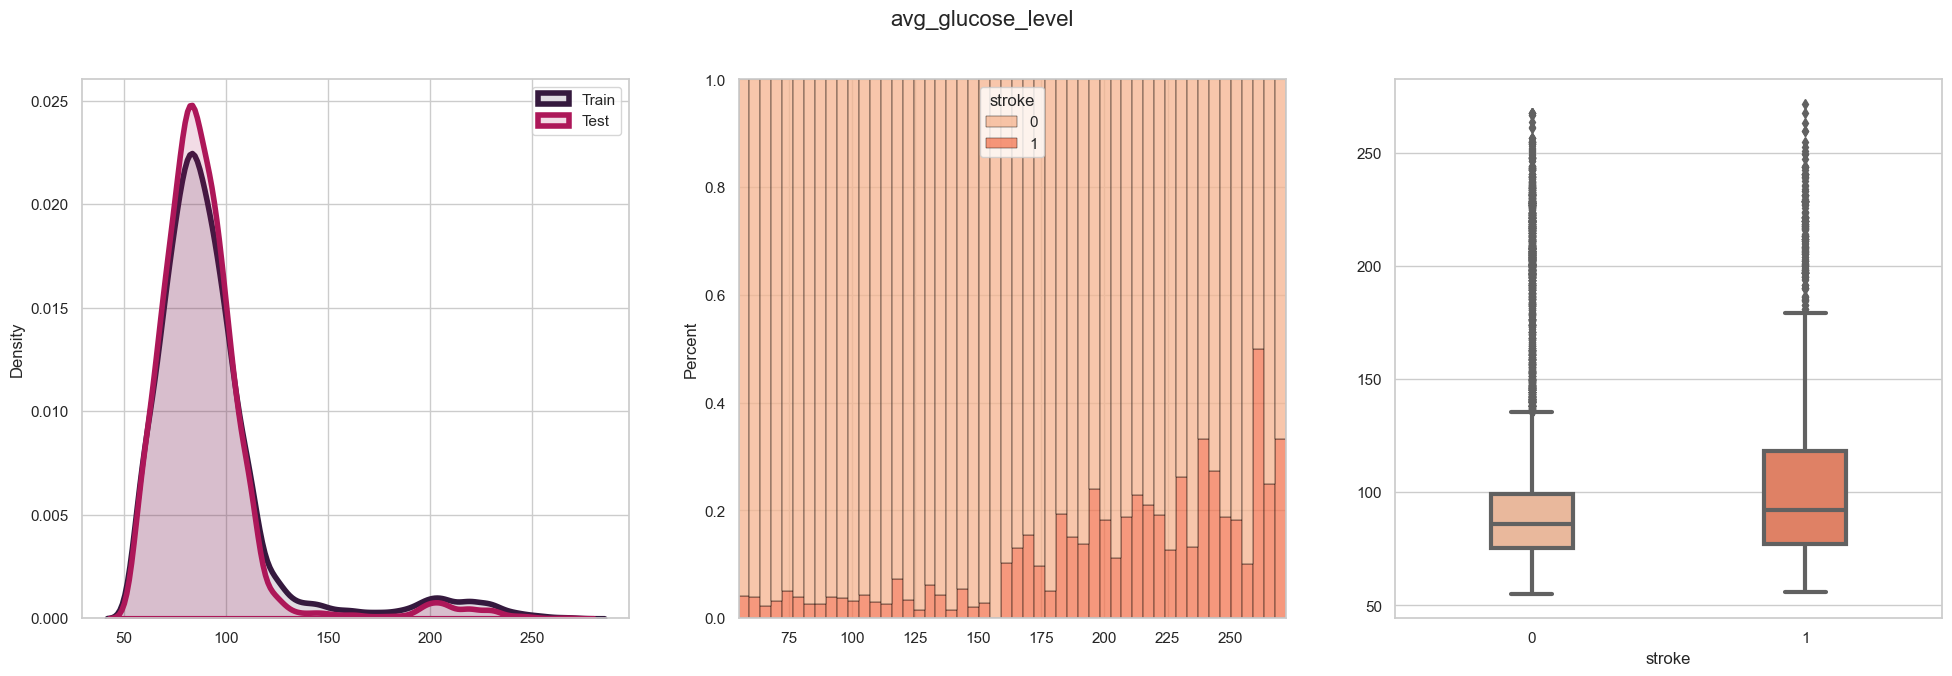

C:\Users\yaman\AppData\Local\Temp\ipykernel_18020\2510170621.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(training_set[i], shade=True, color=colors[5], ax=ax[0], label='Train', alpha=0.15, linewidth=4)
C:\Users\yaman\AppData\Local\Temp\ipykernel_18020\2510170621.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_set[i], shade=True, color=colors[3], ax=ax[0], label='Test', alpha=0.15, linewidth=4)
C:\Users\yaman\AppData\Local\Temp\ipykernel_18020\2510170621.py:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = legend.legendHandles


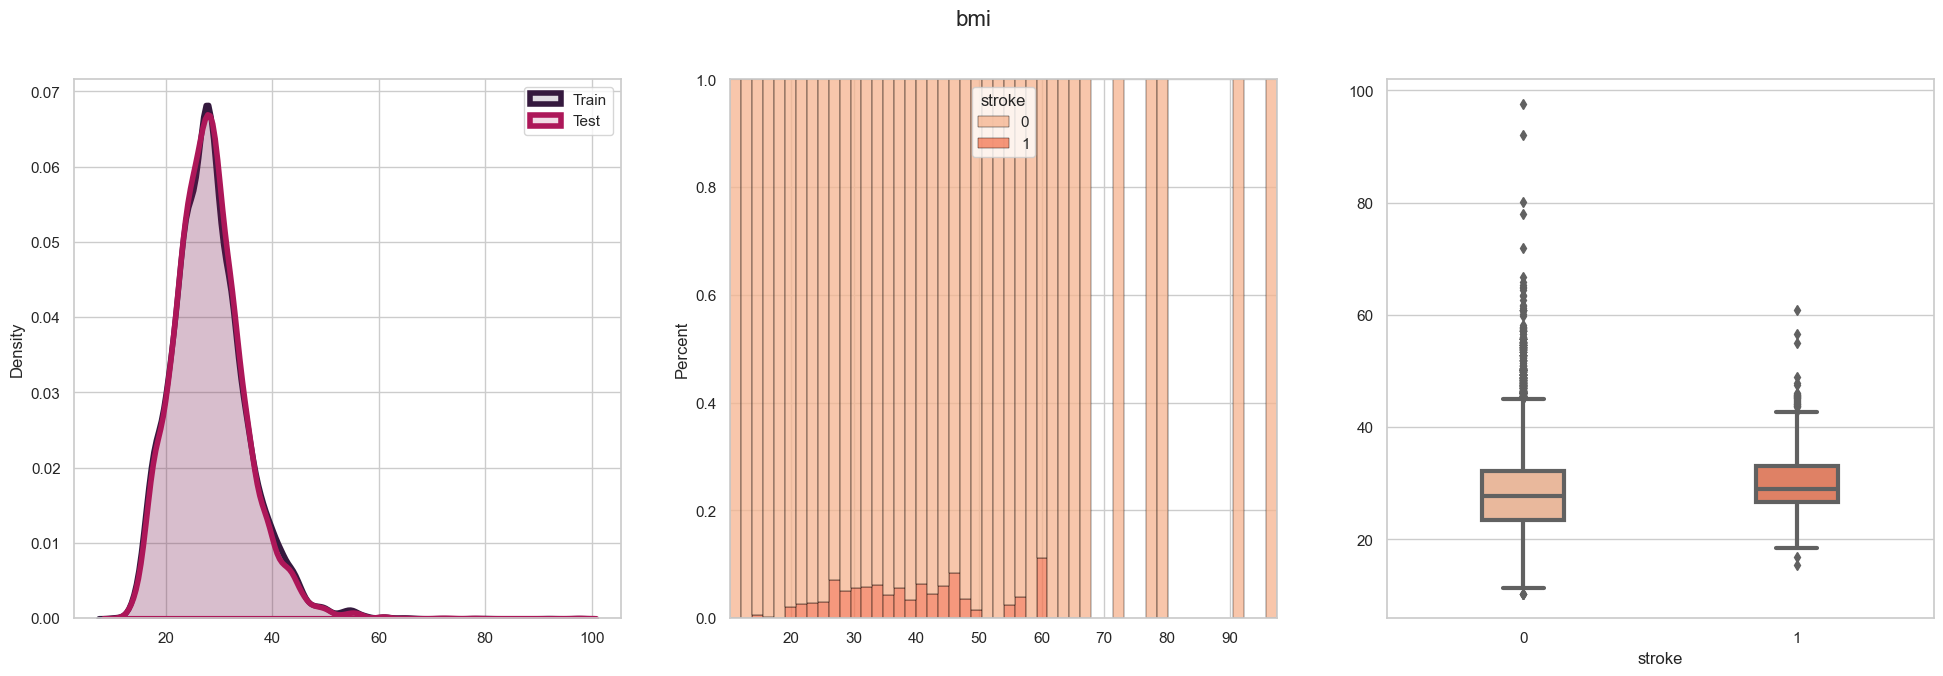

In [863]:
column = ['age', 'avg_glucose_level', 'bmi']
colors = sns.color_palette("rocket_r")

for i in column:
    sns.set_style('whitegrid')
    fig, ax = plt.subplots(1, 3, figsize=(24,7))

    fig.suptitle(i, fontsize=16)

 
    sns.kdeplot(training_set[i], shade=True, color=colors[5], ax=ax[0], label='Train', alpha=0.15, linewidth=4)
    sns.kdeplot(test_set[i], shade=True, color=colors[3], ax=ax[0], label='Test', alpha=0.15, linewidth=4)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('Density')
    handles, labels = ax[0].get_legend_handles_labels()
    ax[0].legend(handles, labels)
    

    sns.histplot(x=i, data=training_set, hue='stroke', bins=50, stat='percent', ax=ax[1], multiple='fill', palette=colors[:2], linewidth=0.3, edgecolor='black') 
    ax[1].set_xlabel('')
    legend = ax[1].get_legend()
    handles = legend.legendHandles
    ax[1].legend(handles, ['0', '1'], title='stroke')

    sns.boxplot(y=i, x='stroke', data=training_set, width=0.3, ax=ax[2], palette=colors, linewidth=3)
    ax[2].set_xlabel('stroke')
    ax[2].set_ylabel('')

    plt.show()

In [864]:
plot_columns = ['gender','hypertension','heart_disease','Residence_type','work_type','ever_married','smoking_status']

In [865]:
# import plotly.colors as colors
# from plotly.subplots import make_subplots
# import plotly.graph_objs as go


# fig = make_subplots(rows=3, cols=2, subplot_titles=[f"count plot of {column} vs stroke" for column in plot_columns])

# for i, column in enumerate(plot_columns):
#     fig.add_trace(go.Bar(x=training_set[column], y=training_set['stroke'], 
#                          marker=dict(color=training_set['stroke'], coloraxis="coloraxis")),
#                   row=(i // 2) + 1, col=(i % 2) + 1)
#     fig.update_xaxes(title_text=column, row=(i // 2) + 1, col=(i % 2) + 1)
#     fig.update_yaxes(title_text="Count", row=(i // 2) + 1, col=(i % 2) + 1)
    
# fig.update_layout(height=1500, width=1500, coloraxis=dict(colorscale='thermal', colorbar=dict(title='Stroke')))
# fig.show()

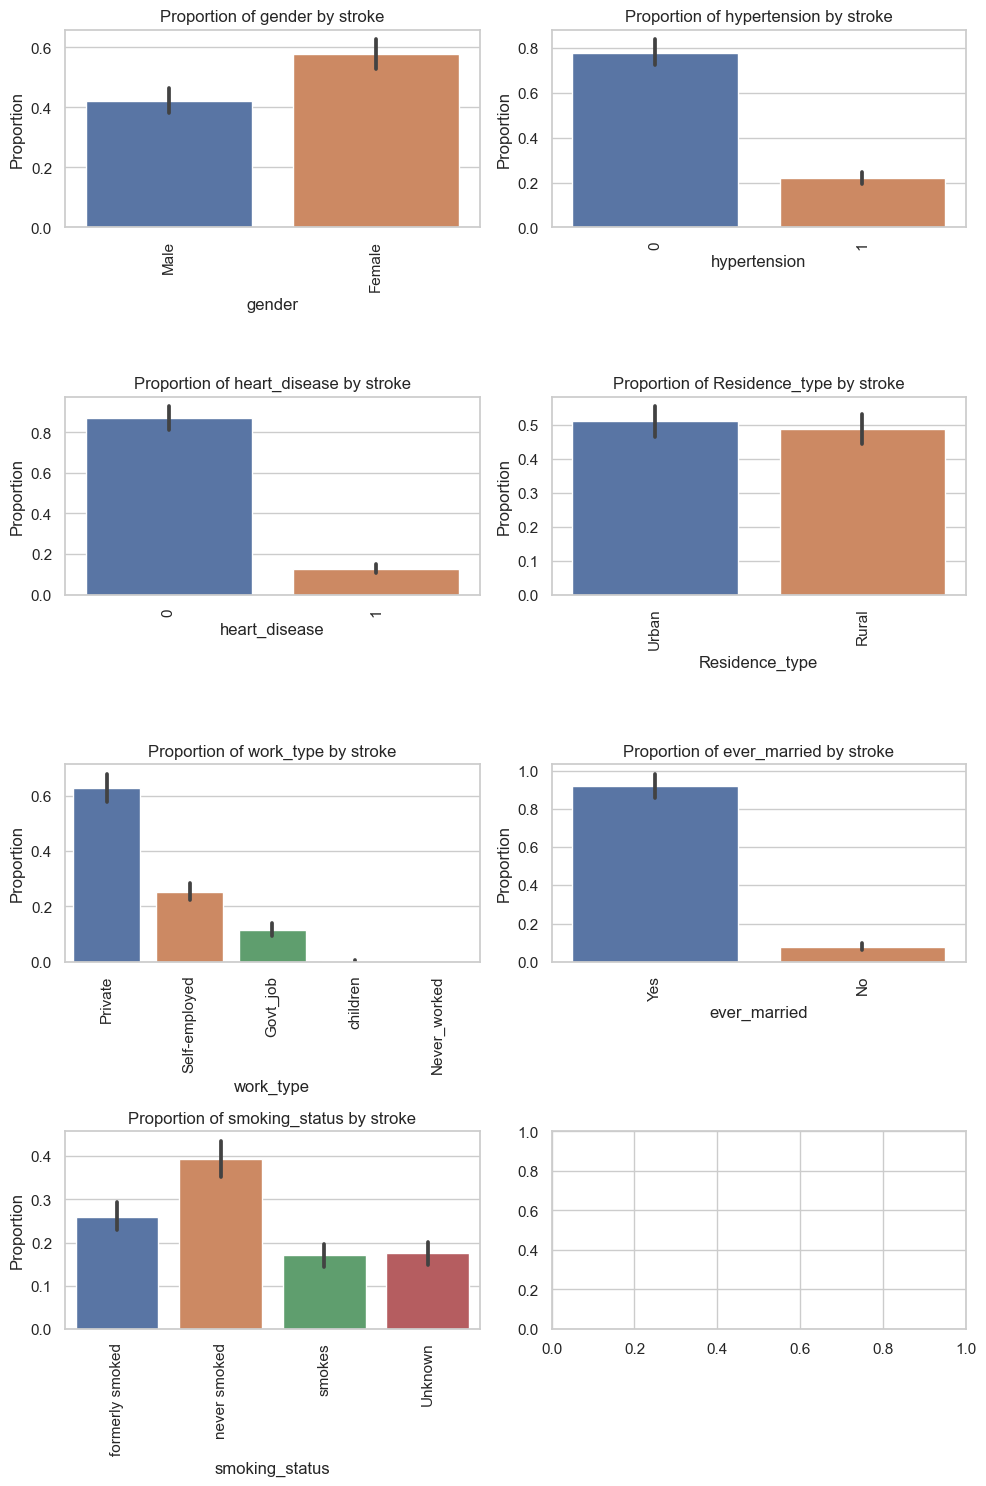

In [866]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))
axes = axes.flatten()

for i, columns in enumerate(plot_columns):
    sns.barplot(x=columns, y='stroke', data=training_set, estimator=lambda x: sum(x) /training_set['stroke'].sum(), ax=axes[i])

    axes[i].set_title(f"Proportion of {columns} by stroke")
    axes[i].set_xlabel(columns)
    axes[i].set_ylabel("Proportion")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

plt.tight_layout(pad=1)
plt.show()

In [867]:
# sns.pairplot(data=training_set[['age', 'bmi', 'avg_glucose_level']], kind='hist',diag_kind="kde", plot_kws ={'alpha':0.5 , 'bins':30})


In [868]:
# # we plot it now 

# plt.figure(figsize = (10,6))

# plt.title("Stroke According to Gender")
# stroke_counts = [training_set['stroke'].value_counts()[0], training_set['stroke'].value_counts()[1]]

# # Create a list of labels for the x-axis
# labels = ['No Stroke', 'Stroke']

# sns.countplot(training_set, x = training_set["gender"], hue ='stroke')


# # accroding the plot it seems like the females has a stroke alittle bit more than men

<Axes: title={'center': 'People who have stroke'}, xlabel='age', ylabel='Count'>

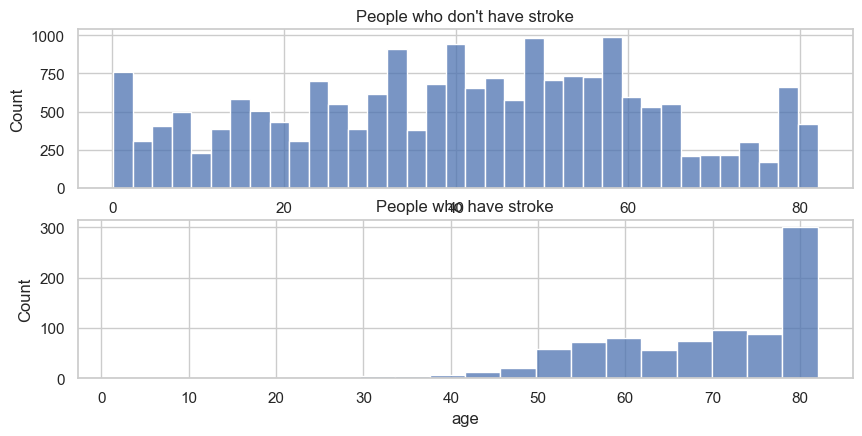

In [869]:
fig = plt.figure(figsize=(10,7))
plt.subplot(311)
plt.title("People who don't have stroke")
sns.histplot(data=training_set[training_set['stroke'] == 0],x='age')
plt.xlabel('')
plt.subplot(312)
plt.title("People who have stroke")
sns.histplot(data=training_set[training_set['stroke'] == 1],x='age')

# lets see the age relation 
#sns.histplot(training_set , x = 'age' , hue = 'stroke')

# seems like the distribution is kind of even but there is a peak aroud 50 
# Also seems the older you get the higher chance you are gonna get a stroke

In [870]:
# plt.figure(figsize = (10,6))

# plt.title("heart disease relation  with having a stroke")

# sns.countplot(training_set , x = training_set['heart_disease'] , hue = 'stroke')


In [871]:
# plt.figure(figsize = (10,6))

# plt.title("Hypertension relation with having a stroke")


# sns.countplot(training_set , x = training_set['hypertension'] , hue = 'stroke')


# # in the hypertenstion and heartdisease it does seem like having a conditon
# # could effect if you are going to have a stroke 

In [872]:
# plt.figure(figsize = (10,6))

# plt.title("Smoking relation  with having a stroke")


# sns.countplot(training_set , x = training_set['smoking_status'] , hue = 'stroke')

# #smoking doesnt clearly seem to effect having a stroke or not but it could be useful i think

In [873]:
# plt.figure(figsize = (10,6))

# plt.title("Marriage relation  with having a stroke")


# Marriage_relation =sns.countplot(training_set , x = training_set['ever_married'] , hue = 'stroke')

In [874]:
# plt.figure(figsize = (10,6))

# plt.title("correlation of the data with having a stroke")

# corr_heatmap= training_set.corr()
# sns.heatmap(corr_heatmap , annot =True,cmap ='coolwarm')

# # #so from the heatmap it seems like the age is the biggest indicator here.
# # # then we have heart disease hypertension and glocuse level.  

In [875]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20411 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             20411 non-null  object 
 1   age                20411 non-null  float64
 2   hypertension       20411 non-null  int64  
 3   heart_disease      20411 non-null  int64  
 4   ever_married       20411 non-null  object 
 5   work_type          20411 non-null  object 
 6   Residence_type     20411 non-null  object 
 7   avg_glucose_level  20411 non-null  float64
 8   bmi                20411 non-null  float64
 9   smoking_status     20411 non-null  object 
 10  stroke             20411 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.9+ MB


In [876]:
training_set.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [877]:
training_set.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Imputation


In [878]:
# training_set['risk_factors'] = training_set[[
#       'avg_glucose_level', 'age', 'bmi', 
#       'hypertension', 'heart_disease', 
#       'smoking_status'
#   ]].apply(
#       lambda x: \
#       0 + (1 if x.avg_glucose_level > 99 else 0) + \
#       (1 if x.age > 45 else 0) + (1 if x.bmi > 24.99 else 0) + \
#       (1 if x.hypertension == 1 else 0) + \
#       (1 if x.heart_disease == 1 else 0) + \
#       (1 if x.smoking_status in ['formerly smoked', 'smokes'] else 0),
#       axis=1
#   )
# training_set.head()

## Feature Engineering 

In [879]:
# training_set['age/bmi'] = training_set.age / training_set.bmi
# training_set['age*bmi'] = training_set.age * training_set.bmi
# training_set['bmi/prime'] = training_set.bmi / 25
# training_set['obesity'] = training_set.avg_glucose_level * training_set.bmi / 1000
# training_set['blood_heart']= training_set.hypertension*training_set.heart_disease

In [880]:
# import numpy as np

# # get the indices of rows with 'Unknown' in the 'smoking_status' column
# unknown_rows = training_set.loc[training_set['smoking_status'] == 'Unknown'].index

# # randomly select half of the 'Unknown' rows to be assigned 'smokes'
# smokes_rows = np.random.choice(unknown_rows, size=len(unknown_rows) // 2, replace=False)
# training_set.loc[smokes_rows, 'smoking_status'] = 'smokes'

# # assign the other half of the 'Unknown' rows to be assigned 'never smoked'
# never_smoked_rows = np.setdiff1d(unknown_rows, smokes_rows)
# training_set.loc[never_smoked_rows, 'smoking_status'] = 'never smoked'


In [881]:
training_set

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [882]:
train_set = training_set.copy()
train_set['gender'] = train_set['gender'].map({'Female':0,'Male':1})
train_set['ever_married'] = train_set['ever_married'].map({'No':0,'Yes':1})
train_set['work_type'] = train_set['work_type'].map({'Private':2,'Self-employed':4,'Govt_job':3,'children':1,'Never_worked':0})
train_set['smoking_status']= train_set['smoking_status'].map({'formerly smoked':3 ,'never smoked':1 , 'smokes':2 , 'Unknown':0})
train_set['Residence_type'] = train_set["Residence_type"].map({'Urban':1 , 'Rural':0})

train_set.dtypes



gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

<Axes: title={'center': 'correlation of the data with having a stroke'}>

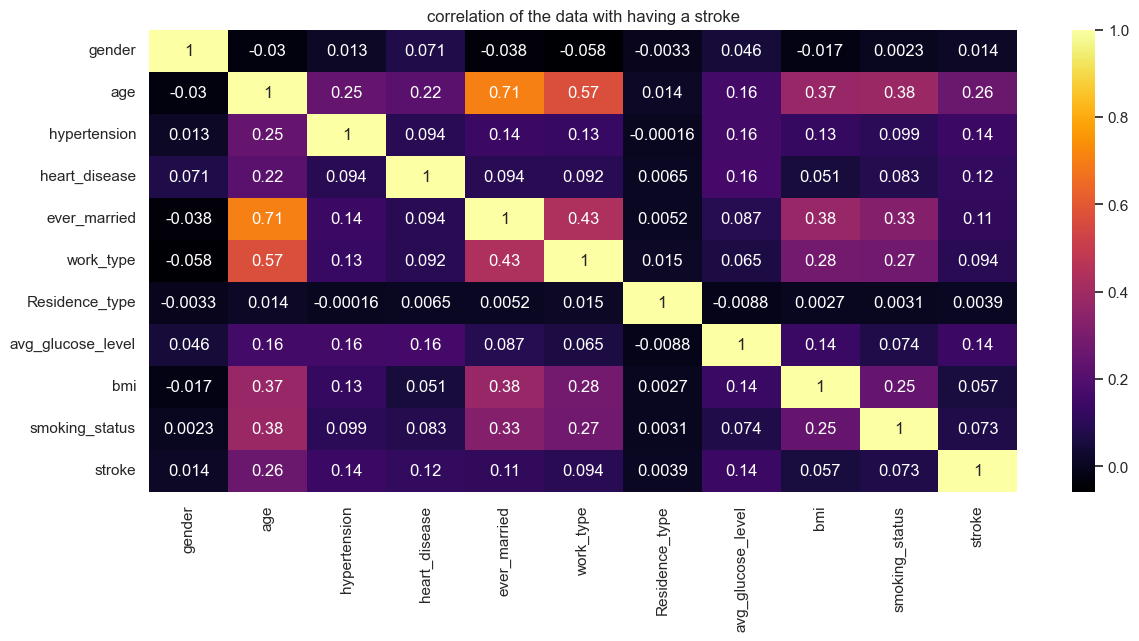

In [883]:
plt.figure(figsize = (14,6))

plt.title("correlation of the data with having a stroke")

corr_heatmap= train_set.corr()
sns.heatmap(corr_heatmap , annot =True,cmap ='inferno')

# #so from the heatmap it seems like the age is the biggest indicator here.
# # then we have heart disease hypertension and glocuse level.  

In [884]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20411 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             20411 non-null  int64  
 1   age                20411 non-null  float64
 2   hypertension       20411 non-null  int64  
 3   heart_disease      20411 non-null  int64  
 4   ever_married       20411 non-null  int64  
 5   work_type          20411 non-null  int64  
 6   Residence_type     20411 non-null  int64  
 7   avg_glucose_level  20411 non-null  float64
 8   bmi                20411 non-null  float64
 9   smoking_status     20411 non-null  int64  
 10  stroke             20411 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.9 MB


## Reading The test data

In [885]:
# test_set['risk_factors'] = test_set[[
#      'avg_glucose_level', 'age', 'bmi', 
#      'hypertension', 'heart_disease', 
#       'smoking_status'
#   ]].apply(
#       lambda x: \
#       0 + (1 if x.avg_glucose_level > 99 else 0) + \
#       (1 if x.age > 45 else 0) + (1 if x.bmi > 24.99 else 0) + \
#       (1 if x.hypertension == 1 else 0) + \
#       (1 if x.heart_disease == 1 else 0) + \
#       (1 if x.smoking_status in ['formerly smoked', 'smokes'] else 0),
#       axis=1
#   )

# test_set.head()

In [886]:
# test_set['age/bmi'] = test_set.age / test_set.bmi
# test_set['age*bmi'] = test_set.age * test_set.bmi
# test_set['bmi/prime'] = test_set.bmi / 25
# test_set['obesity'] = test_set.avg_glucose_level * test_set.bmi / 1000
# test_set['blood_heart']= test_set.hypertension*test_set.heart_disease
# test_set.head()

## Preprocessing the test data

In [887]:
# import numpy as np

# # get the indices of rows with 'Unknown' in the 'smoking_status' column
# unknown_rows = test_set.loc[test_set['smoking_status'] == 'Unknown'].index

# # randomly select half of the 'Unknown' rows to be assigned 'smokes'
# smokes_rows = np.random.choice(unknown_rows, size=len(unknown_rows) // 2, replace=False)
# test_set.loc[smokes_rows, 'smoking_status'] = 'smokes'

# # assign the other half of the 'Unknown' rows to be assigned 'never smoked'
# never_smoked_rows = np.setdiff1d(unknown_rows, smokes_rows)
# test_set.loc[never_smoked_rows, 'smoking_status'] = 'never smoked'


In [888]:
test_data = test_set.copy()
test_data['gender'] =test_data['gender'].map({'Female':0,'Male':1,'Other':2})
test_data['work_type'] = test_data['work_type'].map({'Private':2,'Self-employed':4,'Govt_job':3,'children':1,'Never_worked':0})
test_data['ever_married'] = test_data['ever_married'].map({'No':0,'Yes':1})
test_data['smoking_status']= test_data['smoking_status'].map({'formerly smoked':3 ,'never smoked':1 , 'smokes':2 , 'Unknown':0})
test_data['Residence_type'] = test_data["Residence_type"].map({'Urban':1 , 'Rural':0})


In [889]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10204 entries, 0 to 10203
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10204 non-null  int64  
 1   gender             10204 non-null  int64  
 2   age                10204 non-null  float64
 3   hypertension       10204 non-null  int64  
 4   heart_disease      10204 non-null  int64  
 5   ever_married       10204 non-null  int64  
 6   work_type          10204 non-null  int64  
 7   Residence_type     10204 non-null  int64  
 8   avg_glucose_level  10204 non-null  float64
 9   bmi                10204 non-null  float64
 10  smoking_status     10204 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 877.0 KB


In [890]:
y = train_set['stroke']
features =['gender', 'age','hypertension','ever_married','work_type','heart_disease', 'avg_glucose_level', 'bmi','smoking_status','Residence_type']
X = train_set[features]

## Modeling using XGB & other models

In [891]:
# from sklearn.ensemble import RandomForestClassifier

# # create and train the Random Forest classifier
# params = {
#     'n_estimators': 100,
#     'max_depth': 3,
#     'min_samples_split': 3,
#     'min_samples_leaf': 3,
#     'bootstrap': True,
#     'random_state': 42
# }
# model = RandomForestClassifier(**params)


In [892]:
# from lightgbm import LGBMClassifier

# # create and train the LightGBM classifier
# params = {
#     'max_depth': 3,
#     'learning_rate': 0.1,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     'reg_alpha': 0.5,
#     'reg_lambda': 1.5,
#     'min_child_weight': 5,
#     'objective': 'binary',
#     'metric': 'auc'
# }
# clf = LGBMClassifier(**params)
# clf.fit(X, y)

# # make predictions on the test set
# X_test = test_data[features]
# preds = clf.predict_proba(X_test)[:, 1]


In [893]:
# from catboost import CatBoostClassifier

# # create and train the CatBoost classifier
# params = {
#     'iterations': 150,
#     'learning_rate': 0.1,
#     'depth': 4,
#     'l2_leaf_reg': 2,
#     'border_count': 64,
#     'thread_count': -1,
#     'loss_function': 'Logloss',
#     'eval_metric': 'AUC',
#     'random_seed': 42
# }

# clf = CatBoostClassifier(**params)
# clf.fit(X, y)

# X_test = test_data[features]
# # make predictions on the test set
# preds = clf.predict_proba(X_test)[:, 1]


In [894]:
# import xgboost as xgb



# # create the DMatrix for XGBoost
# dtrain = xgb.DMatrix(X, label=y)

# # set the hyperparameters for the XGBoost model
# params = {'max_depth': 3, 'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'auc'}

# # train the XGBoost model
# model = xgb.train(params=params, dtrain=dtrain, num_boost_round=100)

# # make predictions on the test set
# X_test = test_data[features]
# dtest = xgb.DMatrix(X_test)
# y_pred = model.predict(dtest)



In [895]:
# from xgboost import XGBRegressor
# # Splitting data into training and validation sets
# # X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Scaling the features using MinMaxScaler
# # scaler = MinMaxScaler()
# # X_train = scaler.fit_transform(X_train)
# # X_val = scaler.transform(X_val)
# # X_test = scaler.transform(test_data[features])

# # Training a Random Forest Classifier
# X_test = test_data[features]
# rfc =XGBRegressor()
# rfc.fit(X, y)

# # Predicting on the test set
# test_pred = rfc.predict(X_test)


## Defining The parameters for the model

In [896]:
from xgboost import XGBClassifier
# create and train the XGBoost classifier
params = {
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.5,
    'lambda': 1.5,
    'alpha': 0.5,
    'min_child_weight': 5,
    'max_delta_step': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}
model = XGBClassifier(**params)

## Hold-out Validation

In [897]:
X_tr , X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2)
model.fit(X_tr,y_tr)
val_preds = model.predict_proba(X_val)[:,1]
print(mean_absolute_error(y_val, val_preds))


0.07404481676848984


In [898]:
model.fit(X,y)
X_test = test_data[features]
# make predictions on the test set
preds = model.predict_proba(X_test)[:, 1]



<function matplotlib.pyplot.show(close=None, block=None)>

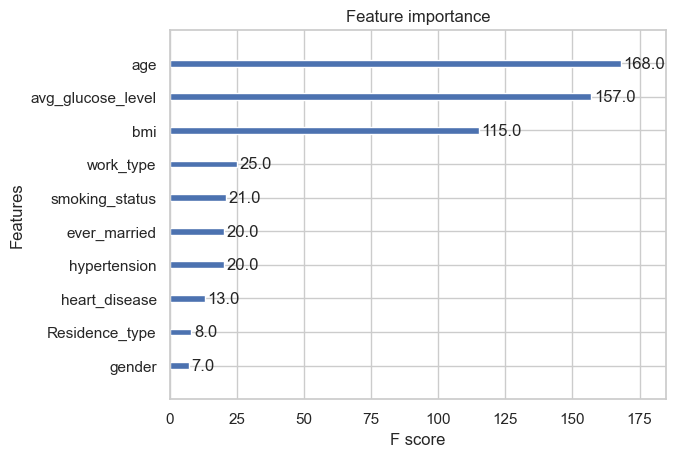

In [899]:
xgb.plot_importance(model)
plt.show

## Generating Predictions 🎉

In [900]:
output = pd.DataFrame({'id': test_data['id'], 'stroke': preds})

In [901]:
output.to_csv('bruhhh.csv',index=False)